# Small Worlds
#### This project was made as a collaboration between Lucas Morais Freire, João Gabriel Rodrigues de Azevedo and João Victor Moura Monteiro Madruga.
The dataset used was provided by [alvarofpp](https://github.com/alvarofpp/dataset-flights-brazil)

In [1]:
# install dependencies
%pip install networkx
%pip install nxviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


We will be using the dataset containing airport and flight data in Brazil to conduct a series of analysis using graph theory concepts. We will now lay the groundwork so that the requirements that were set for this project are fulfilled, and for that we will first execute some scripts provided by [alvarofpp](https://github.com/alvarofpp/dataset-flights-brazil). To get up-to-date data, we executed the `extract.py` script, then we built the `.csv` files needed by executing `transform_to_airports_csv.py` and `transform_to_anac_csv.py`. Finally, we executed `transform_to_graphml.py` to build the `.graphml` file. Now that we have our datasets sorted out, it's time to get to the analysis.

In [2]:
#import some libraries that will be needed:
import networkx as nx
import nxviz as nv

c:\Users\glori\AppData\Local\Programs\Python\Python311\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [3]:
# Instantiate a Graph() object and put the data in the .graphml file inside it.
G = nx.Graph()
G = nx.read_graphml('data/air_traffic.graphml')

This graph contains many international flights that will not matter to the discussions presented in this notebook. We will exclude them from this graph:

In [4]:
nodes_to_remove = []

for node_data in G.nodes(data=True):
    if node_data[1]['country'] != 'BRASIL': # if the country is not brazil, we will discard them from the graph.
        nodes_to_remove.append(node_data[0])

G.remove_nodes_from(nodes_to_remove)

for node_data in G.nodes(data=True):
    print(node_data)

print(G)

('SBCF', {'name': 'CONFINS', 'country': 'BRASIL', 'latitude': -19.62444305419922, 'longitude': -43.97194290161133, 'region': 'SUDESTE'})
('SBGL', {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'latitude': -22.8099994659, 'longitude': -43.2505569458, 'region': 'SUDESTE'})
('SBGR', {'name': 'GUARULHOS', 'country': 'BRASIL', 'latitude': -23.435556411743164, 'longitude': -46.47305679321289, 'region': 'SUDESTE'})
('SSUM', {'name': 'UMUARAMA', 'country': 'BRASIL', 'latitude': -23.7987003326416, 'longitude': -53.31380081176758, 'region': 'SUL'})
('SNBG', {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'latitude': -19.499000549316406, 'longitude': -41.04180145263672, 'region': 'SUDESTE'})
('SSBG', {'name': 'BENTO GONÇALVES', 'country': 'BRASIL', 'latitude': -29.1483325958, 'longitude': -51.5363883972, 'region': 'SUL'})
('SBCV', {'name': 'CARAVELAS', 'country': 'BRASIL', 'latitude': -17.6523, 'longitude': -39.253101, 'region': 'NORDESTE'})
('SBLP', {'name': 'BOM JESUS DA LAPA', 'country': 'BRASI

As you can see, now we have airports in Brazil only. The first requirement of this analysis project is to calculate the assortativity coefficient with respect to the 'region' attribute of each node (airport).

In [5]:
nx.attribute_assortativity_coefficient(G, 'region')

0.3725974224135195

As you can see, the positive value of the assortativity coefficient implies that indeed there is a tendency for flights to occur between airports that are in the same region.

We can vizualize this better if we take a look at a map that represents the network:

In [6]:
#import pyplot
from matplotlib import pyplot as plt

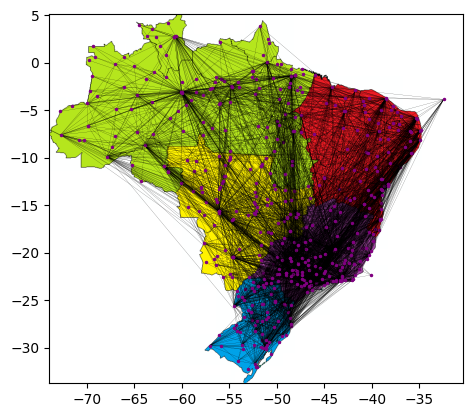

In [7]:
img = plt.imread('images/brazilregions.png')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-73.99055556, -34.79305556, -33.75083333, 5.172222222])

already_drawn = []
for node in G.nodes(data=True):
    x1 = float(node[1]['longitude'])
    y1 = float(node[1]['latitude'])
    already_drawn.append(node[0])
    for neighbor in G.neighbors(node[0]):
        if neighbor not in already_drawn:
            x2 = float(nx.get_node_attributes(G, 'longitude')[neighbor])
            y2 = float(nx.get_node_attributes(G, 'latitude')[neighbor])
            plt.plot([x1, x2], [y1, y2], color='black', linewidth=0.1)
    plt.plot(x1, y1, 'o', color='purple', markersize=1.5)
plt.savefig(fname="images/graph_map.png", dpi=800)

As you can see, there is a clear tendency in some regions that suggest that there are more flights inside the regions instead of in between, although the sum of the flights between regions for any region might get close to the internal flights.

In [8]:
nx.attribute_mixing_matrix(G, "region")

array([[0.08231173, 0.0107268 , 0.02035902, 0.05461909, 0.01335377],
       [0.0107268 , 0.05341506, 0.02287653, 0.0339317 , 0.01204028],
       [0.02035902, 0.02287653, 0.13222417, 0.02758319, 0.00711471],
       [0.05461909, 0.0339317 , 0.02758319, 0.17294221, 0.04060858],
       [0.01335377, 0.01204028, 0.00711471, 0.04060858, 0.07267951]])

Now, we will carry out a bivariate analysis of the node degrees:

In [9]:
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)
nx.degree_assortativity_coefficient(G, 'region')


-0.19605264855558172

The negative value suggests that nodes with lots of neighbours tend to have a low average neighbour degree. This makes sense because airports from cities that are not very big tend to only have flights to the bigger cities in the same region or state, often the capitals. So the big cities end up having lots of neighbours of small degree and with just a few neighbours of high degree.

Now we will plot a graph that shows the relationship between the node degree and the average degree of its neighbours:

In [10]:
import seaborn as sns

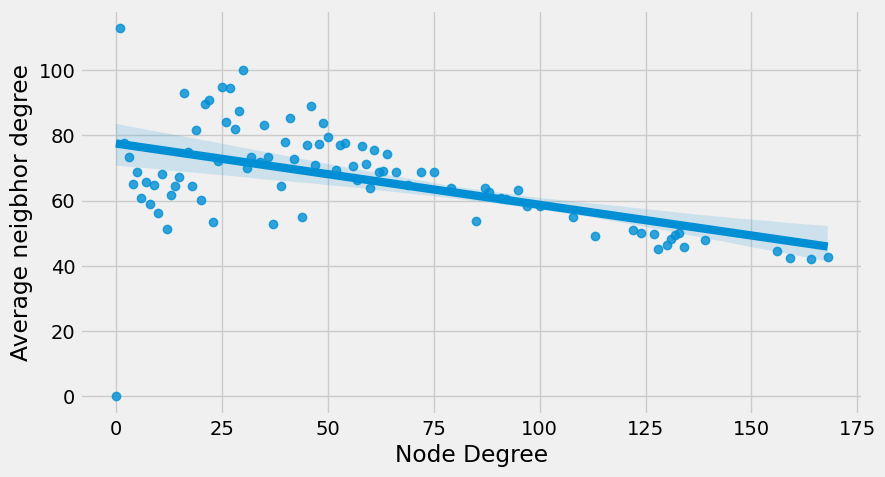

In [11]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(9,5))

sns.regplot(x=degree,y=avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")

# Save figure
plt.savefig("images/degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

Once again, this only confirms what has been discussed earlier, nodes of high degree tend to have lots of nodes of smaller degree.

Now, we will check how many connected componets there are in the network:

In [12]:
nx.number_connected_components(G)

6

In [13]:
S = nx.connected_components(G)

for component in list(S):
    print(component)


{'SSFB', 'SNDR', 'SBLP', 'SBIT', 'SWPC', 'SDAN', 'SWNH', 'SDBB', 'SWDE', 'SNVR', 'SNDT', 'SNMU', 'SNLO', 'SBIH', 'SBCD', 'SNEB', 'SSND', 'SWKN', 'SJRG', 'SSPG', 'SDFR', 'SBPN', 'SBFI', 'SBVC', 'SDSC', 'SBMG', 'SSCC', 'SBGS', 'SWYY', 'SBRP', 'SWBV', 'SNSH', 'SWMK', 'SJDB', 'SNJN', 'SWDB', 'SBSG', 'SSAB', 'SBPI', 'SNOX', 'SWQR', 'SBJE', 'SNKI', 'SDLK', 'SBUY', 'SWSQ', 'SJVO', 'SNBV', 'SBKG', 'SSER', 'SNOB', 'SWUQ', 'SBSP', 'SNYB', 'SJGU', 'SBSL', 'SWXM', 'SBJV', 'SNIG', 'SBPM', 'SNZA', 'SWYN', 'SBFZ', 'SWMW', 'SBMS', 'SBAT', 'SBGV', 'SBAS', 'SWPD', 'SWHT', 'SNDV', 'SNBW', 'SJLM', 'SBRB', 'SSVI', 'SBSM', 'SBSI', 'SNPD', 'SSGY', 'SNBA', 'SWGN', 'SNQD', 'SNBS', 'SNOS', 'SBTK', 'SWAE', 'SBTT', 'SNSM', 'SBPA', 'SWOB', 'SNDC', 'SDLU', 'SWSI', 'SBQV', 'SNUB', 'SBUA', 'SWCI', 'SBGP', 'SBHT', 'SNDH', 'SBBP', 'SBTG', 'SDIM', 'SWJN', 'SWCA', 'SNIC', 'SBJA', 'SNGI', 'SNEE', 'SBLS', 'SIQE', 'SWFE', 'SBPG', 'SNXB', 'SBBZ', 'SBVH', 'SSRS', 'SBUL', 'SDRS', 'SNVS', 'SBRF', 'SSJA', 'SNCI', 'SWKK', 'SSCK',

As you can see, most nodes are connected, but there are a few isolated nodes. We could assume it's because they are international-only airports or private airports.

Now, we will check the percentage of nodes in each connected component that are from each region:

In [14]:
S = nx.connected_components(G)
for i, comp in enumerate(list(S)):
    sudeste = norte = nordeste =  sul = centroOeste = 0
    for airp in comp:
        if nx.get_node_attributes(G, 'region')[airp] == 'NORTE':
            norte += 1
        if nx.get_node_attributes(G, 'region')[airp] == 'SUDESTE':
            sudeste +=1
        if nx.get_node_attributes(G, 'region')[airp] == 'SUL':
            sul +=1
        if nx.get_node_attributes(G, 'region')[airp] == 'CENTRO-OESTE':
            centroOeste +=1
        if nx.get_node_attributes(G, 'region')[airp] == 'NORDESTE':
            nordeste +=1
    
    print("int the set number ",i, ', ', 100*(norte/len(comp)),"% of the airports are from the north region.", sep='')
    print("int the set number ",i, ', ', 100*(nordeste/len(comp)),"% of the airports are from the northeast region.", sep='')
    print("int the set number ",i, ', ', 100*(sul/len(comp)),"% of the airports are from the south region.", sep='')
    print("int the set number ",i, ', ', 100*(sudeste/len(comp)),"% of the airports are from the southeast region.", sep='')
    print("int the set number ",i, ', ', 100*(centroOeste/len(comp)),"% of the airports are from the central-west region.", sep='')

int the set number 0, 24.95049504950495% of the airports are from the north region.
int the set number 0, 18.81188118811881% of the airports are from the northeast region.
int the set number 0, 14.85148514851485% of the airports are from the south region.
int the set number 0, 23.564356435643564% of the airports are from the southeast region.
int the set number 0, 17.82178217821782% of the airports are from the central-west region.
int the set number 1, 0.0% of the airports are from the north region.
int the set number 1, 0.0% of the airports are from the northeast region.
int the set number 1, 0.0% of the airports are from the south region.
int the set number 1, 100.0% of the airports are from the southeast region.
int the set number 1, 0.0% of the airports are from the central-west region.
int the set number 2, 100.0% of the airports are from the north region.
int the set number 2, 0.0% of the airports are from the northeast region.
int the set number 2, 0.0% of the airports are from

Now we will create a simulated scenario, where a person will travel through all 5 regions of Brazil ('NORTE', 'SUL', 'NORDESTE', 'CENTRO-OESTE' and 'SUDESTE', in that order) and they are supposed to finish that trip in less than 30 days.

Below, you can check the 5 airports of each region that we chose to make the simulation.

#### CITY 1 NORTE: SBBV;
#### CITY 2 SUL: SBFL;
#### CITY 3 NORDESTE: SBRF;
#### CITY 4 CENTRO-OESTE: SBCY;
#### CITY 5 SUDESTE: SBSP.

Next, you will see how many and which connections were needed to make the flights from one region to the other.

In [15]:
# ROTA MAIS CURTA DO NORTE PARA O SUL
# BOA VISTA PARA FLORIANOPOLIS - PREÇO MÉDIO R$1832,00 - GOL - TEMPO DE VOO 8H20MIN - DIA 1 - 18/06
# SAIDA 2:55 - CHEGADA 12:15 
print(nx.shortest_path(G,"SBBV","SBFL"))
print(nx.shortest_path_length(G,"SBBV","SBFL"))

['SBBV', 'SBFL']
1


In [16]:
# ROTA MAIS CURTA DO SUL PARA O NORDESTE
# FLORIANOPOLIS PARA RECIFE - PREÇO MÉDIO R$637,00 - LATAM - TEMPO DE VOO 11H20MIN - DIA 2 - 19/06
# SAIDA 11:15 - CHEGADA 22:35
print(nx.shortest_path(G,"SBFL","SBRF"))
print(nx.shortest_path_length(G,"SBFL","SBRF"))


['SBFL', 'SBRF']
1


In [17]:
# ROTA MAIS CURTA DO NORDESTE PARA O CENTRO-OESTE
# RECIFE PARA VARZEA GRANDE - PREÇO MÉDIO - R$1538,00 - LATAM - TEMPO DE VOO 6H20MIN - 20/06
# SAIDA 12:12 - CHEGADA 17:30
print(nx.shortest_path(G,"SBRF","SBCY"))
print(nx.shortest_path_length(G,"SBRF","SBCY"))

['SBRF', 'SBCY']
1


In [18]:
# ROTA MAIS CURTA DO CENTRO-OESTE PARA O SUDESTE
# VARZEA GRANDE PARA SAO PAULO - PREÇO MÉDIO R$585,00 - AZUL - TEMPO DE VOO 2H10MIN
# SAIDA 20:20 - CHEGADA 23:30
print(nx.shortest_path(G,"SBCY","SBSP"))
print(nx.shortest_path_length(G,"SBCY","SBSP"))

['SBCY', 'SBSP']
1


As you can see, each trip only needs one connection to arrive at its destination, that is because each airport was chosen with the intention of making the entire trip as short as possible. We also inserted some comments showing the price range as well as the time of each flight so we could estimate the cost as well as the time it took for the whole trip.

Cost estimate: R$4592.00  
Flight time range: 03d & 02:35 (3 days, 2 hours and 35 minutes)

Now, we will calculate the clustering coefficient of the national air network (Brazil), as well as the air sub-networks of each region (NORTH, NORTHEAST, SOUTH, SOUTHEAST and CENTRAL-WEST).

In [19]:
import copy

Gnorte = copy.deepcopy(G)
Gnorte.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'NORTE'])
Gnordeste = copy.deepcopy(G)
Gnordeste.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'NORDESTE'])
Gsul = copy.deepcopy(G)
Gsul.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'SUL'])
Gsudeste = copy.deepcopy(G)
Gsudeste.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'SUDESTE'])
GcentroOeste = copy.deepcopy(G)
GcentroOeste.remove_nodes_from([node for node in G.nodes if nx.get_node_attributes(G, 'region')[node] != 'CENTRO-OESTE'])
print('geral:', nx.average_clustering(G))
print('NORTE:', nx.average_clustering(Gnorte))
print('NORDESTE', nx.average_clustering(Gnordeste))
print('SUL', nx.average_clustering(Gsul))
print('SUDESTE', nx.average_clustering(Gsudeste))
print('CENTRO-OESTE', nx.average_clustering(GcentroOeste))
print('geral:', nx.clustering(G))
print('NORTE:', nx.clustering(Gnorte))
print('NORDESTE', nx.clustering(Gnordeste))
print('SUL', nx.clustering(Gsul))
print('SUDESTE', nx.clustering(Gsudeste))
print('CENTRO-OESTE', nx.clustering(GcentroOeste))

geral: 0.6298820670024339
NORTE: 0.6129174483757455
NORDESTE 0.4901000932205856
SUL 0.5907956617622269
SUDESTE 0.6055274251271584
CENTRO-OESTE 0.5665069530501539
geral: {'SBCF': 0.29049897470950103, 'SBGL': 0.28487161693268565, 'SBGR': 0.2114342743085258, 'SSUM': 0.7142857142857143, 'SNBG': 0, 'SSBG': 0, 'SBCV': 0.725, 'SBLP': 0.6666666666666666, 'SBSV': 0.270698766881973, 'SNGI': 0.6909090909090909, 'SNTF': 0.7948717948717948, 'SBAR': 0.6327868852459017, 'SBMO': 0.5358558558558558, 'SBPL': 0.6579591836734694, 'SNBR': 0.6007130124777184, 'SNVR': 0, 'SBKP': 0.23200992555831265, 'SBBV': 0.4, 'SBFL': 0.44533547179898425, 'SBPA': 0.28308961379827524, '1AON': 0.9555555555555556, 'SBAA': 0.7032967032967034, 'SBAS': 0.9934640522875817, 'SBAU': 0.6998299319727891, 'SBBE': 0.25900758533501894, 'SBBH': 0.20738794681952075, 'SBBR': 0.26128662287561255, 'SBCG': 0.44670846394984326, 'SBCH': 0.4581920903954802, 'SBCJ': 0.5372340425531915, 'SBCT': 0.2880368513751524, 'SBCY': 0.24186046511627907, 'SBD

The result above shows both the clustering average for the whole graph and then each region, and the individual clustering that each airport has in a national scope and in a regional scope.

The results suggest that most airport's neighbours are connected to each other, meaning tht most airports have a tendency to cluster together. Notice that inside regions this coefficient is a bit lower, that could be because, in Brazil, it is more likely for someone to fly to other regions than their own, given that the usual circumstance to travel by plane is that you are going somewhere so far that it is unfeasible to go by car or other methods. Therefore it is safe to assume that by cutting off other regions of the graph, the number of connections lost is more significant than the reduction of possible connections between each vertex's neighbour.